In [110]:
#!pip install git+https://github.com/mhamilton723/tseries
#!pip install utils

In [116]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet
from sklearn import datasets
from tseries import cascade_cv,time_series_split,TimeSeriesRegressor

In [112]:
df = pd.read_csv('STP-20171124170718044.csv')
df.Data = pd.to_datetime(pd.Series(df.Data))
#df.Data = pd.DatetimeIndex(df.Data)

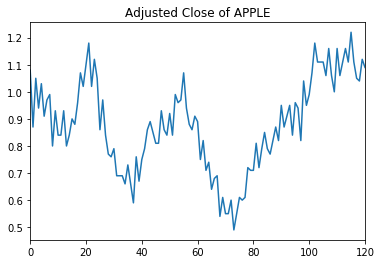

In [113]:
X = df
Y = df['SELIC']
X_train, X_test = time_series_split(X)
Y_train, Y_test = time_series_split(Y)

Y.plot()
plt.title("Adjusted Close of APPLE")
plt.show()

In [103]:
df.Data = pd.DatetimeIndex(df.Data)

In [115]:
#from sklearn.grid_search import GridSearchCV
#from sklearn.cross_validation import KFold
#from TimeSeriesEstimator import cascade_cv

features = df.columns.drop("Data","SELIC").tolist()

X = df[features]
Y = df['SELIC']
X_train, X_test = time_series_split(X)
Y_train, Y_test = time_series_split(Y)

n_prev = 3
tsr = TimeSeriesRegressor(ElasticNet(max_iter=1000), n_prev=n_prev)

param_grid = [{'alpha': [.01, .05, .1, .5, 1, 5, 10], 
               'l1_ratio': [0,.25,0.5,.75,1]}]

cv = cascade_cv(len(X_train), n_folds=5)
grid = GridSearchCV(tsr, param_grid, cv=cv)
grid.fit(X_train, y_train)
pred_train_3 = grid.predict(X_train)  # outputs a numpy array of length: len(X_train)-n_prev
pred_test_3 = grid.predict(X_test)

#print(grid.grid_scores_)
print(grid.best_params_)
train_test_plot(pred_train_3, y_train, pred_test_3, y_test, n_prev, 'Optimized Lasso TSR on SELIC')

AttributeError: 'dict' object has no attribute 'iteritems'

In [118]:
X = datasets.fetch_kddcup99

In [122]:
X()

extraction done


{'data': array([[0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        ..., 
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0]], dtype=object),
 'target': array([b'normal.', b'normal.', b'normal.', ..., b'normal.', b'normal.',
        b'normal.'], dtype=object)}

<function sklearn.datasets.kddcup99.fetch_kddcup99>